In [1]:
# Setup
import importlib
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

import sccoda.datasets as scd

In [7]:
# Load data
cell_counts = pd.read_csv('epithelial_cells_counts_v4_TAsplit.csv')
cell_counts

,sample,age,sex,batch,status,EEC,Early enterocytes,Enterocytes CeD,Goblet cells,Intermediate enterocytes,...,Mature enterocytes,Paneth cells,Secretory progenitor,Stem cells,TA G1,TA G2M,TA S,TA-Ent,Tuft cells,BEST4 cells
0,CeD1,10,M,A,CeD,53,23,215,4,26,...,1,43,7,70,129,65,62,34,27,0
1,CeD2,14,F,A,CeD,59,76,79,11,36,...,21,28,2,55,100,40,48,47,31,7
2,CeD2,14,F,F,CeD,16,44,70,4,16,...,17,0,4,78,61,22,53,29,7,3
3,CeD3,14,F,A,CeD,114,160,49,5,242,...,91,8,15,94,114,53,54,125,67,27
4,CeD4,17,F,A,CeD,12,49,110,15,6,...,1,35,4,36,63,20,50,35,9,0
5,CeD4,17,F,F,CeD,33,20,68,13,3,...,0,7,6,15,23,14,44,12,9,1
6,Ctrl1,15,F,A,Ctrl,120,141,5,7,298,...,85,52,17,24,46,16,27,86,96,16
7,Ctrl1,15,F,F,Ctrl,80,81,7,8,158,...,28,21,20,42,38,31,40,68,55,10
8,Ctrl2,11,M,F,Ctrl,71,263,44,12,273,...,234,18,2,70,281,33,74,169,64,8
9,Ctrl4,12,M,A,Ctrl,28,145,12,28,210,...,271,8,2,35,90,13,19,88,42,25


In [8]:
# Convert data to anndata object
data_all = dat.from_pandas(cell_counts, covariate_columns = ['sample', 'age', 'sex', 'batch', 'status'])
print(data_all.obs)

   sample  age sex batch status
0    CeD1   10   M     A    CeD
1    CeD2   14   F     A    CeD
2    CeD2   14   F     F    CeD
3    CeD3   14   F     A    CeD
4    CeD4   17   F     A    CeD
5    CeD4   17   F     F    CeD
6   Ctrl1   15   F     A   Ctrl
7   Ctrl1   15   F     F   Ctrl
8   Ctrl2   11   M     F   Ctrl
9   Ctrl4   12   M     A   Ctrl
10  Ctrl5   15   F     A   Ctrl


<AxesSubplot:xlabel='Cell type', ylabel='Proportion'>

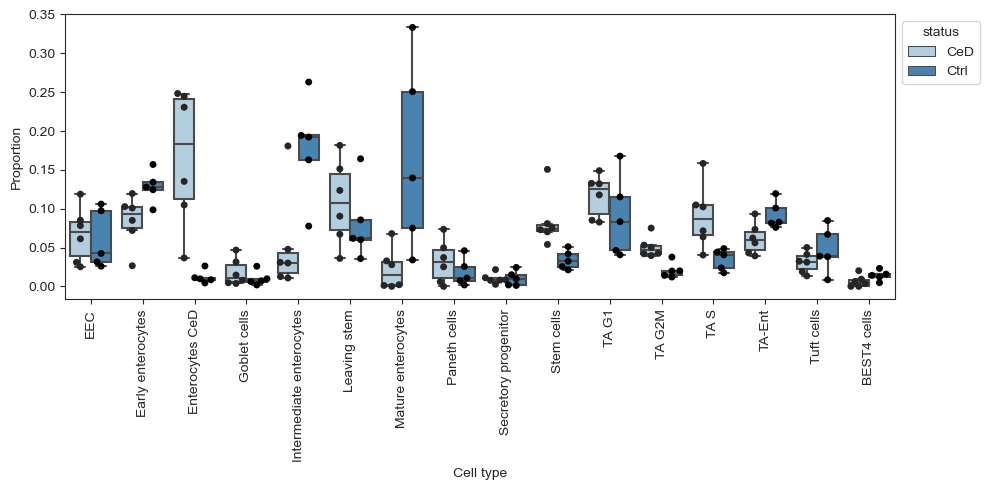

In [9]:
viz.boxplots(data_all, feature_name = 'status', figsize = (10,5), add_dots = True)

In [10]:
# Model
model = mod.CompositionalAnalysis(data_all, formula = "~C(status, Treatment('Ctrl')) + age + sex + batch", reference_cell_type = "automatic")
results = model.sample_hmc(num_results = 250000, num_burnin = 10000)
results.summary()
pd.DataFrame.to_csv(results.effect_df, 'scCODA_epithelia_effects_summary_v4.csv')

Automatic reference selection! Reference cell type set to Secretory progenitor
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|█████████████████████████████████████████████████████████████████████████| 250000/250000 [24:32<00:00, 169.83it/s]


MCMC sampling finished. (1571.272 sec)
Acceptance rate: 9.0%
Compositional Analysis summary:

Data: 11 samples, 16 cell types
Reference index: 8
Formula: ~C(status, Treatment('Ctrl')) + age + sex + batch

Intercepts:
                          Final Parameter  Expected Sample
Cell Type                                                 
EEC                                 1.439        64.331811
Early enterocytes                   2.003       113.075331
Enterocytes CeD                    -0.116        13.586196
Goblet cells                       -0.118        13.559050
Intermediate enterocytes            2.296       151.571012
Leaving stem                        2.059       119.588208
Mature enterocytes                  2.397       167.679470
Paneth cells                        0.571        27.005870
Secretory progenitor               -0.015        15.030091
Stem cells                          0.415        23.105120
TA G1                               1.728        85.888869
TA G2M          